# Quantify Macro Relationships

In [5]:
import pandas as pd
import statsmodels.api as sm

data_m = pd.read_csv("../../../data/processed/us_macro_monthly.csv", index_col=0, parse_dates=True)
factors = pd.read_csv("../../../data/processed/yield_curve_factors.csv", index_col=0, parse_dates=True)
macro_factors = pd.concat([data_m, factors], axis=1).dropna()
macro_factors

,DFF,DGS2,DGS10,CPIAUCSL,M2SL,GDPC1,UNRATE,spread_10y_2y,inflation_yoy,m2_growth_yoy,gdp_growth_yoy,real_dff,log_gdp,log_m2,PC1_Level,PC2_Slope,PC3_Curvature
1982-01-31,13.220645,14.568000,14.594000,94.400,1770.4,7295.631,8.6,0.026000,8.256881,10.174871,-2.190515,4.963764,8.895031,7.478961,21.019689,-0.077729,0.042877
1982-02-28,14.779286,14.823333,14.425556,94.700,1774.5,7295.631,8.9,-0.397778,7.613636,9.625008,-2.190515,7.165649,8.895031,7.481274,21.614308,0.998339,0.707984
1982-03-31,14.677742,14.194348,13.861304,94.700,1786.5,7295.631,9.0,-0.333043,6.884876,9.159233,-2.190515,7.792866,8.895031,7.488014,20.100473,0.813701,0.386244
1982-04-30,14.937000,14.202381,13.871905,95.000,1803.9,7328.912,9.3,-0.330476,6.621773,8.721070,-1.010745,8.315227,8.899582,7.497706,20.068455,0.919863,0.310112
1982-05-31,14.454839,13.777000,13.622500,95.900,1815.4,7328.912,9.4,-0.154500,6.911929,9.085446,-1.010745,7.542910,8.899582,7.504061,19.309262,0.559139,0.215721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,4.475161,4.225714,4.391429,317.603,21441.8,23586.542,4.1,0.165714,2.872366,3.576570,2.399788,1.602795,10.068432,9.973098,-0.944962,1.443090,0.090427
2025-01-31,4.330000,4.271905,4.629048,319.086,21510.9,23548.210,4.0,0.357143,2.999413,3.551709,2.019273,1.330587,10.066805,9.976315,-0.646594,1.164298,0.103912
2025-02-28,4.330000,4.210000,4.451053,319.775,21584.2,23548.210,4.1,0.241053,2.814270,3.466260,2.019273,1.515730,10.066805,9.979717,-0.898534,1.318041,0.103299
2025-03-31,4.330000,3.970000,4.280476,319.615,21656.9,23548.210,4.2,0.310476,2.405585,3.616078,2.019273,1.924415,10.066805,9.983079,-1.232613,1.387224,0.285815


#### Regression

In [17]:
X = macro_factors[["inflation_yoy", "gdp_growth_yoy", "UNRATE", "m2_growth_yoy"]]
Y = macro_factors[["PC1_Level", "PC2_Slope", "PC3_Curvature"]]

X = sm.add_constant(X)  # add intercept

models = {}
for col in Y.columns:
    model = sm.OLS(Y[col], X).fit()
    models[col] = model

In [13]:
models['PC1_Level'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PC1_Level   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     68.81
Date:                Sat, 25 Oct 2025   Prob (F-statistic):           1.18e-46
Time:                        14:35:44   Log-Likelihood:                -1617.6
No. Observations:                 520   AIC:                             3245.
Df Residuals:                     515   BIC:                             3267.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -14.5508      1.134    -12.827      0.000     -16.779     -12.322
inflation_yoy      1.9033      0.149     12.764      0.000       1.610       2.196
gdp_growth_yoy     0.8093      0.118      6.834      0.000       0.577       1.042
UNRATE             1.3196      0.147      8.975      0.000       1.031       1.608
m2_growth_yoy     -0.1811      0.063     -2.884      0.004      -0.305      -0.058
==============================================================================
Omnibus:                       28.947   Durbin-Watson:                   0.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.310
Skew:                          -0.578   Prob(JB):                     9.64e-08
Kurtosis:                       3.394   Cond. No.                         47.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
models['PC2_Slope'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PC2_Slope   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     103.5
Date:                Sat, 25 Oct 2025   Prob (F-statistic):           1.21e-64
Time:                        14:36:03   Log-Likelihood:                -664.84
No. Observations:                 520   AIC:                             1340.
Df Residuals:                     515   BIC:                             1361.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.4890      0.182     13.710      0.000       2.132       2.846
inflation_yoy      0.1022      0.024      4.284      0.000       0.055       0.149
gdp_growth_yoy    -0.1052      0.019     -5.550      0.000      -0.142      -0.068
UNRATE            -0.4521      0.024    -19.214      0.000      -0.498      -0.406
m2_growth_yoy      0.0308      0.010      3.066      0.002       0.011       0.051
==============================================================================
Omnibus:                        7.108   Durbin-Watson:                   0.127
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                7.018
Skew:                           0.252   Prob(JB):                       0.0299
Kurtosis:                       3.266   Cond. No.                         47.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
models['PC3_Curvature'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          PC3_Curvature   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     16.84
Date:                Sat, 25 Oct 2025   Prob (F-statistic):           5.52e-13
Time:                        14:36:13   Log-Likelihood:                -102.61
No. Observations:                 520   AIC:                             215.2
Df Residuals:                     515   BIC:                             236.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1900      0.062     -3.086      0.002      -0.311      -0.069
inflation_yoy     -0.0222      0.008     -2.744      0.006      -0.038      -0.006
gdp_growth_yoy     0.0021      0.006      0.332      0.740      -0.010       0.015
UNRATE             0.0559      0.008      7.002      0.000       0.040       0.072
m2_growth_yoy     -0.0149      0.003     -4.384      0.000      -0.022      -0.008
==============================================================================
Omnibus:                       25.656   Durbin-Watson:                   0.208
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.853
Skew:                          -0.395   Prob(JB):                     6.03e-09
Kurtosis:                       4.060   Cond. No.                         47.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Summary From Regression
### PC1: Level Factor
| Variable           | Coefficient | p-value | Sign | Economic meaning                                                                                               |
| ------------------ | ----------- | ------- | ---- | -------------------------------------------------------------------------------------------------------------- |
| **const**          | –14.55      | 0.000   | —    | Baseline offset (not meaningful on its own).                                                                   |
| **inflation_yoy**  | **+1.90**   | 0.000 ✅ | 🔺   | Higher inflation → higher overall yield level.                                                                 |
| **gdp_growth_yoy** | **+0.81**   | 0.000 ✅ | 🔺   | Stronger growth → higher term structure level.                                                                 |
| **UNRATE**         | **+1.32**   | 0.000 ✅ | 🔺   | Unexpectedly positive — may reflect late-cycle tightening: yields high when unemployment still low but rising. |
| **m2_growth_yoy**  | **–0.18**   | 0.004 ✅ | 🔻   | Money growth increases liquidity → yields suppressed.                                                          |

PC1 represents the overall level of interest rates — it rises when inflation or growth are strong (tight monetary policy, higher neutral rate) and falls when liquidity is abundant (M2 up).

### PC2: Slope Factor
| Variable           | Coefficient | p-value | Sign | Economic meaning                                                                                                                        |
| ------------------ | ----------- | ------- | ---- | --------------------------------------------------------------------------------------------------------------------------------------- |
| **const**          | 2.49        | 0.000   | —    | Average positive slope.                                                                                                                 |
| **inflation_yoy**  | **+0.10**   | 0.000 ✅ | 🔺   | Mildly counterintuitive — can indicate slope steepening early in tightening cycles (inflation rises → curve steepens before inversion). |
| **gdp_growth_yoy** | **–0.11**   | 0.000 ✅ | 🔻   | Faster growth → Fed hikes → short end rises more → flatter curve.                                                                       |
| **UNRATE**         | **–0.45**   | 0.000 ✅ | 🔻   | Higher unemployment → easing expected → curve steepens; negative coefficient shows flattening when unemployment is low (tight cycle).   |
| **m2_growth_yoy**  | **+0.03**   | 0.002 ✅ | 🔺   | Liquidity expansion → steepens curve (long rates anchored, short rates low).                                                            |

Slope decreases (flattens/inverts) when:
- GDP is strong,
- Unemployment is low,
- Fed tightens.

Steepens when:
- Liquidity increases,
- Unemployment rises (easing cycle).

So PC2 ≈ policy-cycle indicator — it captures monetary stance vs economic slack.

### PC3: Curvature Factor
| Variable           | Coefficient | p-value | Sign | Economic meaning                                                       |
| ------------------ | ----------- | ------- | ---- | ---------------------------------------------------------------------- |
| **const**          | –0.19       | 0.002   | —    | Slight average downward curvature.                                     |
| **inflation_yoy**  | **–0.022**  | 0.006 ✅ | 🔻   | Inflation ↑ → mid-curve flattens (tightening expectations).            |
| **gdp_growth_yoy** | +0.002      | 0.74 ❌  | ⚪    | No significant relation.                                               |
| **UNRATE**         | **+0.056**  | 0.000 ✅ | 🔺   | Rising unemployment → curvature increases (short rates fall).          |
| **m2_growth_yoy**  | **–0.015**  | 0.000 ✅ | 🔻   | Money growth ↑ → curve flattens around mid-term (long inflation risk). |

Curvature is the fine structure of expectations:
- Inflation & liquidity shocks flatten the belly of the curve.
- Weak labor markets cause a hump (short-term yields collapse).


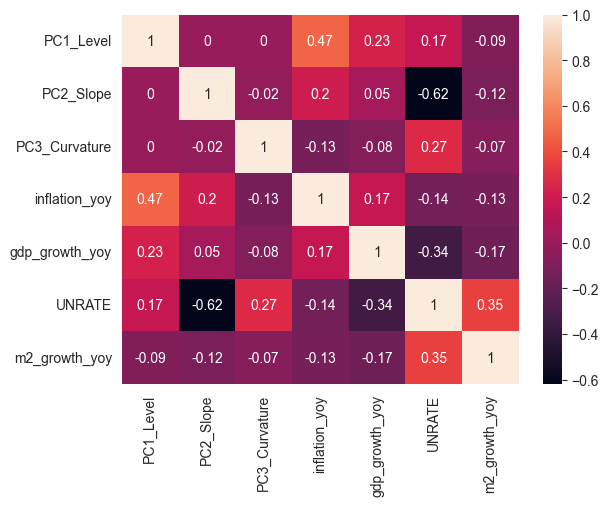

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = macro_factors[["PC1_Level", "PC2_Slope", "PC3_Curvature", "inflation_yoy", "gdp_growth_yoy", "UNRATE", "m2_growth_yoy"]].corr()
sns.heatmap(corr.round(2), annot=True)
plt.show()

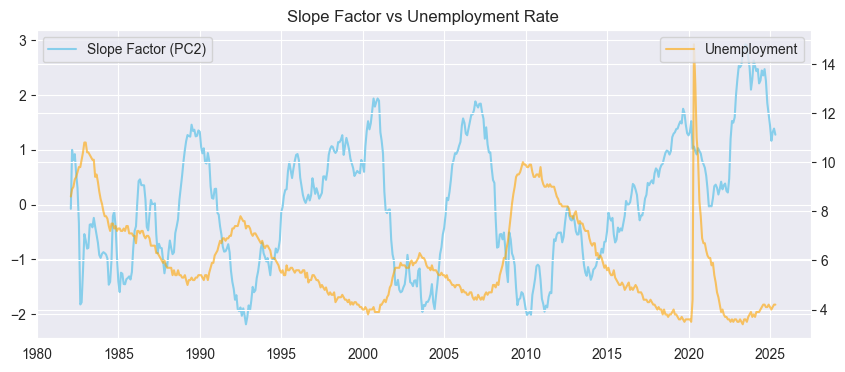

In [10]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(macro_factors["PC2_Slope"], label="Slope Factor (PC2)", color="skyblue")
ax2 = ax.twinx()
ax2.plot(macro_factors["UNRATE"], label="Unemployment", color="orange", alpha=0.6)
ax.set_title("Slope Factor vs Unemployment Rate")
ax.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.show()


In [20]:
corr

,PC1_Level,PC2_Slope,PC3_Curvature,inflation_yoy,gdp_growth_yoy,UNRATE,m2_growth_yoy
PC1_Level,1.000000,0.002386,0.004268,0.470185,0.234394,0.165892,-0.089003
PC2_Slope,0.002386,1.000000,-0.020845,0.197057,0.050469,-0.623062,-0.121341
PC3_Curvature,0.004268,-0.020845,1.000000,-0.134942,-0.081868,0.269297,-0.069934
inflation_yoy,0.470185,0.197057,-0.134942,1.000000,0.165103,-0.140607,-0.125757
gdp_growth_yoy,0.234394,0.050469,-0.081868,0.165103,1.000000,-0.340581,-0.171223
UNRATE,0.165892,-0.623062,0.269297,-0.140607,-0.340581,1.000000,0.345945
m2_growth_yoy,-0.089003,-0.121341,-0.069934,-0.125757,-0.171223,0.345945,1.000000
